# Unit Project - Project 4 

# Who lives and who dies on the Titanic

### The Titanic was a ship disaster that on its maiden voyage sunk in the northern Atlantic on April 15, 1912, killing 1502 out of 2224 passengers and crew. The sinking of the Titanic continues to intrigue society to this day. It has been well-documented that women and children were given priority to board the inadequate number of lifeboats, and families were separated during the evacuation process. 

### Crew were not spared the tragic watery fate, especially the Titanic's musicians who were tasked with playing their tunes as the ship went down over the course of almost 3 hours. The first lifeboat was loaded with passengers after a full hour of it being known that the Titanic was in dire straits. 

### Interviews with survivors also show that the probability of a passenger boarding a lifeboat depended on where they were during the call for evacuation announcement, and also what passenger class they were. 

# Executive Summary

- Using information of passengers aboard the Titanic on its maiden and final voyage, we will perform an analysis to try to understand the different factors behind surviving her sinking.
- We begin with a visual analysis, which will show us the relationship between certain pieces of information and perhaps provide some intuition as to which of these pieces of information might be more useful.
- Thereafter, using various machine learning models, we will also attempt to predict whether a passenger might survive if a similar accident were to occur in the future. Based on the coefficients on our models, we can also glean some insight as to which factors were deemed the most important in coming to a decision. Our models will be scored across various metrics, including accuracy, precision, recall, f1 score, and the ROC curve.
- Finally, we explore how some missing pieces of information can be imputed and whether such imputation is of any help in generating a better model.

# Problem Statement

## What are you trying to find out?

- Write a well-formed problem statement, with reference to the SMART guideline. Remember that not all of the letters may apply in all cases, it is just a guideline you can follow.

> This project will explore the hypothesis below and create a model to predict survival based on selected features of the passenger. 


## What is your dataset about?

- Describe the dataset in words (you could write a short paragraph, describe the columns, create a data dictionary, etc. but do not include descriptive statistics here)

#### Data Dictionary

Variable |	Definition	| Key | Type of Variable
--- | ----| --- | ---
survival |	Survival |	0 = No, 1 = Yes | binary, categorical
pclass |	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd | categorical
sex	| Sex | Male, Female | nominal	
Age	| Age in years	| fractional if less than 1 | continuous
sibsp |	# of siblings / spouses aboard the Titanic | - | numerical	
parch |	# of parents / children aboard the Titanic| - | numerical
ticket | 	Ticket number	| - | nominal
fare |	Passenger fare	| Price of ticket | continuous
cabin |	Cabin number| - | nominal
embarked |	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton | nominal

Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Source: https://www.kaggle.com/c/titanic/data

## Risks and Assumptions

Binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.  Reducing an ordinal or even metric variable to dichotomous level loses a lot of information, which makes this test inferior compared to ordinal logistic regression in these cases.

Secondly, since logistic regression assumes that P(Y=1) is the probability of the event occurring, it is necessary that the dependent variable is coded accordingly.  That is, for a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.

Thirdly, the model should be fitted correctly.  Neither over fitting nor under fitting should occur.  That is only the meaningful variables should be included, but also all meaningful variables should be included.  A good approach to ensure this is to use a stepwise method to estimate the logistic regression.

Fourthly, the error terms need to be independent.  Logistic regression requires each observation to be independent.  That is that the data-points should not be from any dependent samples design, e.g., before-after measurements, or matched pairings.  Also the model should have little or no multicollinearity.  That is that the independent variables should be independent from each other.  However, there is the option to include interaction effects of categorical variables in the analysis and the model.  If multicollinearity is present centering the variables might resolve the issue, i.e. deducting the mean of each variable.  If this does not lower the multicollinearity, a factor analysis with orthogonally rotated factors should be done before the logistic regression is estimated.

Fifthly, logistic regression assumes linearity of independent variables and log odds.  Whilst it does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.  Otherwise the test underestimates the strength of the relationship and rejects the relationship too easily, that is being not significant (not rejecting the null hypothesis) where it should be significant.  A solution to this problem is the categorization of the independent variables.  That is transforming metric variables to ordinal level and then including them in the model.  Another approach would be to use discriminant analysis, if the assumptions of homoscedasticity, multivariate normality, and absence of multicollinearity are met.

Lastly, it requires quite large sample sizes.  Because maximum likelihood estimates are less powerful than ordinary least squares (e.g., simple linear regression, multiple linear regression); whilst OLS needs 5 cases per independent variable in the analysis, ML needs at least 10 cases per independent variable, some statisticians recommend at least 30 cases for each parameter to be estimated.



 > This is also the assumption that all passengers mentioned had equal physical access to a lifeboat. 

## Hypothesis

Null hypothesis, $H_0$: There is no relationship between age, gender and passenger class and survivability on the Titanic

Alternative hypothesis, $H_1$: Being of a lower age, female and in the upper passenger class predicts better survival on the Titanic.

# Exploratory Data Analysis

In [101]:
%matplotlib inline

# for seaborn issue:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import statsmodels as sm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from scipy import stats
import json
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, auc, confusion_matrix, recall_score, precision_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm, preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn import export_graphviz
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import metrics, model_selection
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from os import system
from sklearn.tree import DecisionTreeClassifier, export_graphviz

sns.set(style='white', context='notebook', palette='deep')

In [3]:
titanic = pd.read_csv("/Users/Administrator/Desktop/DS-SG-04/projects/unit-projects/project-4/assets/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [8]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


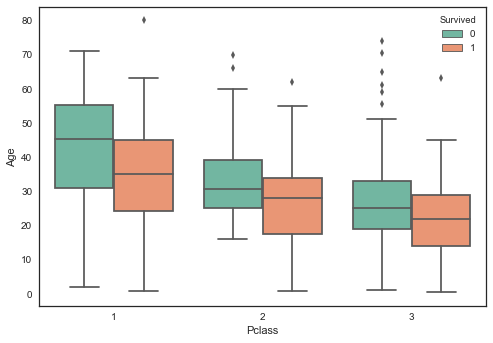

In [9]:
ax = sns.boxplot(x="Pclass", y="Age", hue="Survived",
...                  data=titanic, palette="Set2")

In [10]:
titanic[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
titanic[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
surv = titanic[titanic['Survived']==1]
nosurv = titanic[titanic['Survived']==0]
surv_col = "blue"
nosurv_col = "red"

print("Survived: %i (%.1f percent), Not Survived: %i (%.1f percent), Total: %i"\
      %(len(surv), 1.*len(surv)/len(titanic)*100.0,\
        len(nosurv), 1.*len(nosurv)/len(titanic)*100.0, len(titanic)))

Survived: 342 (38.4 percent), Not Survived: 549 (61.6 percent), Total: 891


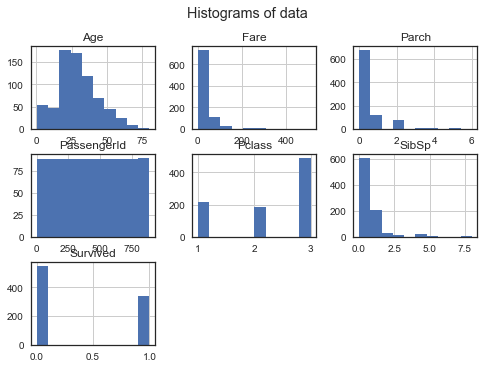

In [14]:
titanic.hist();
plt.suptitle("Histograms of data");

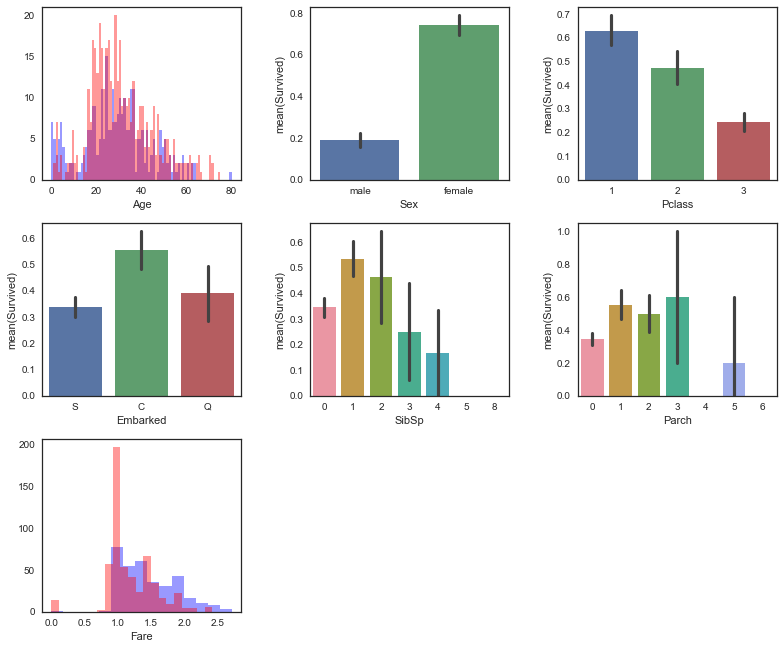

In [15]:
#warnings.filterwarnings(action="ignore")
plt.figure(figsize=[12,10])
plt.subplot(331)
sns.distplot(surv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(nosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,
            axlabel='Age')
plt.subplot(332)
sns.barplot('Sex', 'Survived', data=titanic)
plt.subplot(333)
sns.barplot('Pclass', 'Survived', data=titanic)
plt.subplot(334)
sns.barplot('Embarked', 'Survived', data=titanic)
plt.subplot(335)
sns.barplot('SibSp', 'Survived', data=titanic)
plt.subplot(336)
sns.barplot('Parch', 'Survived', data=titanic)
plt.subplot(337)
sns.distplot(np.log10(surv['Fare'].dropna().values+1), kde=False, color=surv_col)
sns.distplot(np.log10(nosurv['Fare'].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

In [16]:
print("Median age survivors: %.1f, Median age non-survivers: %.1f"\
      %(np.median(surv['Age'].dropna()), np.median(nosurv['Age'].dropna())))

Median age survivors: 28.0, Median age non-survivers: 28.0


In [17]:
tab_pclass = pd.crosstab(titanic['Pclass'], titanic['Survived'])
print(tab_pclass)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [18]:
dummy_Pclass = pd.get_dummies(titanic['Pclass'].astype(int), prefix='PClass')
print (dummy_Pclass.head())

   PClass_1  PClass_2  PClass_3
0         0         0         1
1         1         0         0
2         0         0         1
3         1         0         0
4         0         0         1


In [19]:
cols_to_keep = ['Survived', 'Sex', 'Age', 'SibSp']
handCalc = titanic[cols_to_keep].join(dummy_Pclass.ix[:, 'PClass_1':])
print (handCalc.head())

   Survived     Sex   Age  SibSp  PClass_1  PClass_2  PClass_3
0         0    male  22.0      1         0         0         1
1         1  female  38.0      1         1         0         0
2         1  female  26.0      0         0         0         1
3         1  female  35.0      1         1         0         0
4         0    male  35.0      0         0         0         1


In [20]:
p1_cross = pd.crosstab(handCalc['Survived'], handCalc['PClass_1'], rownames=['Survived'])
print (p1_cross)
odds_survived = p1_cross[1][1]/p1_cross[1][0]
odds_survived

PClass_1    0    1
Survived          
0         469   80
1         206  136


1

In [21]:
p1_cross2 = pd.crosstab(handCalc['Survived'], handCalc['PClass_2'], rownames=['Survived'])
print (p1_cross2)
odds_survived2 = p1_cross2[1][1]/p1_cross2[1][0]
odds_survived2

PClass_2    0   1
Survived         
0         452  97
1         255  87


0

In [22]:
p1_cross3 = pd.crosstab(handCalc['Survived'], handCalc['PClass_3'], rownames=['Survived'])
print (p1_cross3)
odds_survived3 = p1_cross3[1][1]/p1_cross3[1][0]
odds_survived3

PClass_3    0    1
Survived          
0         177  372
1         223  119


0

In [23]:
tab_sibs = pd.crosstab(titanic['SibSp'], titanic['Survived'])
print(tab_sibs)
#dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", 
#                         stacked=True, color=[nosurv_col,surv_col])
#dummy = plt.xlabel('SibSp')
#dummy = plt.ylabel('Percentage')

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


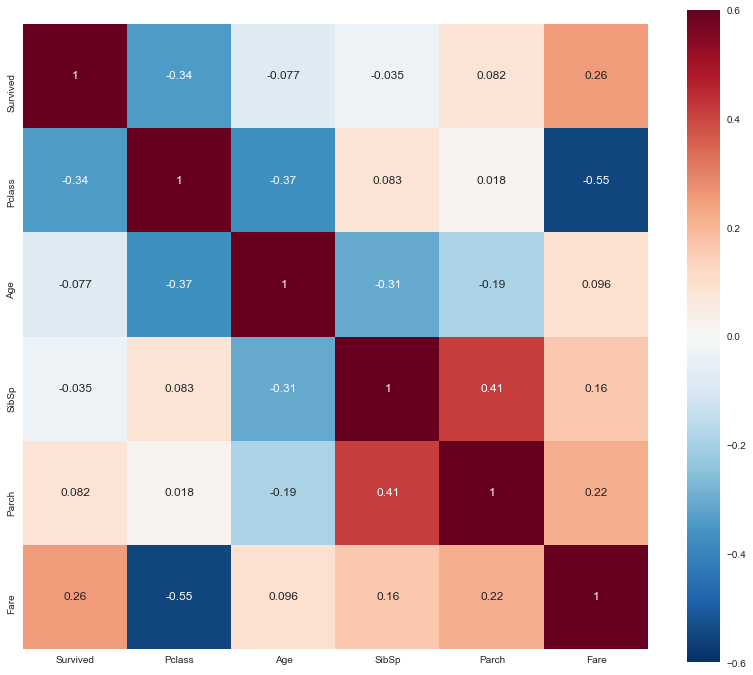

In [24]:
plt.figure(figsize=(14,12))
foo = sns.heatmap(titanic.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

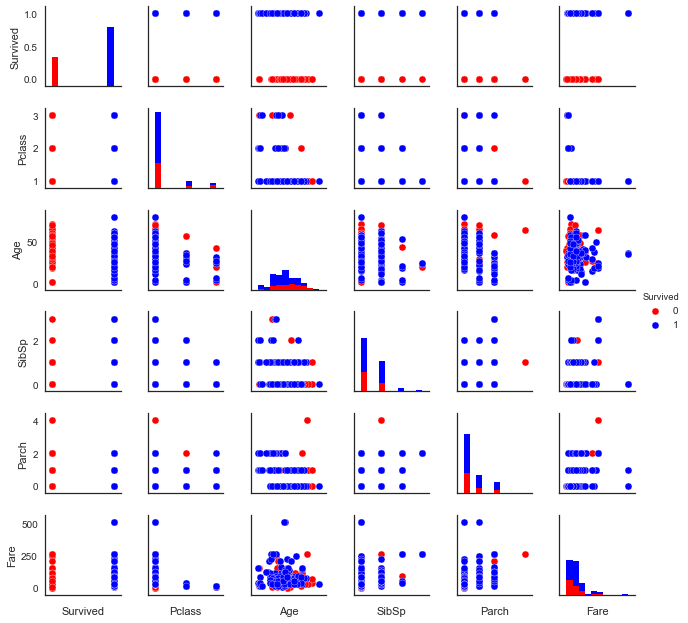

In [25]:
cols = ['Survived','Pclass','Age','SibSp','Parch','Fare']
g = sns.pairplot(data=titanic.dropna(), vars=cols, size=1.5,
                 hue='Survived', palette=[nosurv_col,surv_col])
g.set(xticklabels=[])

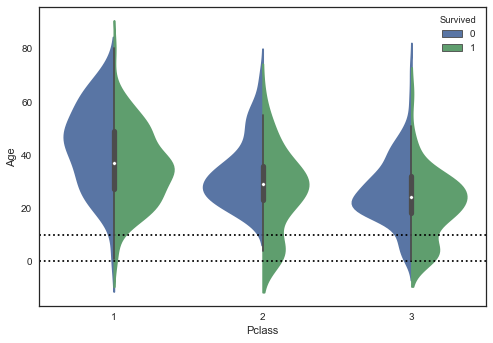

In [26]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=titanic, split=True)
plt.hlines([0,10], xmin=-1, xmax=3, linestyles="dotted")

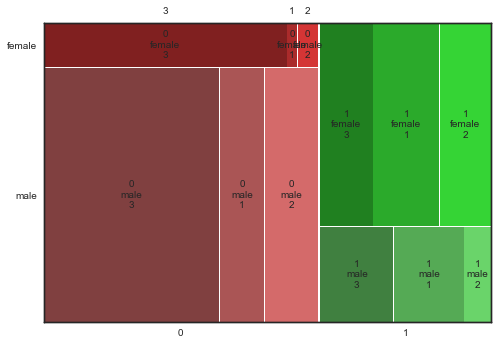

In [27]:
dummy = mosaic(titanic,["Survived","Sex","Pclass"])

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


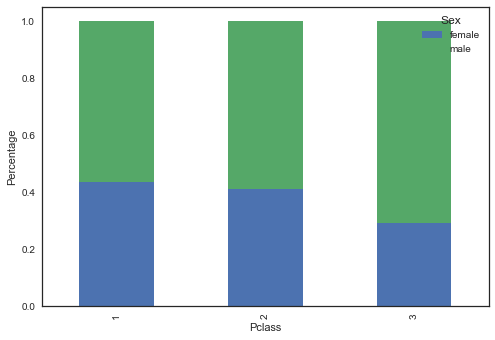

In [28]:
tab = pd.crosstab(titanic['Pclass'], titanic['Sex'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Pclass')
dummy = plt.ylabel('Percentage')

# Data Cleaning

- Prepare your dataset for modeling

In [29]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
titanic2 = titanic.copy()

In [31]:
titanic2.dropna(inplace=True)
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [32]:
titanic2 = pd.get_dummies(titanic2, columns=["Pclass", "Sex", "Embarked"], drop_first=True)
titanic2.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
6,7,0,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,0,0,1,0,1
10,11,1,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,0,1,0,0,1
11,12,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,0,0,0,0,1


In [34]:
features = ["Age", "Pclass_2", "Pclass_3", "Sex_male", "SibSp"]
X = titanic2[features].copy()
y = titanic2["Survived"].copy()

In [35]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.3)

In [38]:
scaler = preprocessing.StandardScaler()

In [39]:
scaler.fit(X_train[["Age"]]) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
X_train_scaled = X_train.copy()
X_train_scaled["Scaled_age"] = scaler.transform(X_train[["Age"]])
X_train_scaled.drop("Age", axis=1, inplace=True)

X_test_scaled = X_test.copy()
X_test_scaled["Scaled_age"] = scaler.transform(X_test[["Age"]])
X_test_scaled.drop("Age", axis=1, inplace=True)

# Modeling

- Run a classification model (or a few, if you like)
- How do you know how well your model is doing?

In [41]:
model_selection.train_test_split

<function sklearn.model_selection._split.train_test_split>

In [42]:
X_train, X_test = model_selection.train_test_split(titanic2, random_state=1)
print X_train.shape, X_test.shape

(137, 14) (46, 14)


In [43]:
kf = model_selection.KFold(n_splits=10, shuffle=True)

In [44]:
X_train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
230,231,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",35.0,1,0,36973,83.4750,C83,0,0,0,0,1
724,725,1,"Chambers, Mr. Norman Campbell",27.0,1,0,113806,53.1000,E8,0,0,1,0,1
257,258,1,"Cherry, Miss. Gladys",30.0,0,0,110152,86.5000,B77,0,0,0,0,1
434,435,0,"Silvey, Mr. William Baird",50.0,1,0,13507,55.9000,E44,0,0,1,0,1
195,196,1,"Lurette, Miss. Elise",58.0,0,0,PC 17569,146.5208,B80,0,0,0,0,0


In [53]:
factors = ['Sex_male', 'Age', "Pclass_2", "Pclass_3", "SibSp"]

In [54]:
titanic2['intercept'] = 1.0
train_cols = titanic2.columns[1:]

In [55]:
logit = sm.Logit(X_train['Survived'], X_train[factors])
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.548778
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  137
Model:                          Logit   Df Residuals:                      132
Method:                           MLE   Df Model:                            4
Date:                Fri, 21 Jul 2017   Pseudo R-squ.:                  0.1332
Time:                        20:25:19   Log-Likelihood:                -75.183
converged:                       True   LL-Null:                       -86.733
                                        LLR p-value:                 0.0001209
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Sex_male      -2.0386      0.446     -4.575      0.000      -2.912      -1.165
Age            0.0332      0.009      3.733      0.000       0.016       0.051
Pclass_2       1.2228      0.892      1.371      0.170      -0.525       2.970
Pclass_3       0.2873      0.812      0.354      0.724      -1.305       1.879
SibSp          0.8664      0.336      2.575      0.010       0.207       1.526
==============================================================================
"""

In [57]:
model = DecisionTreeClassifier()

X = X_train[['Sex_male','Age','Pclass_2','Pclass_3','SibSp','Survived']].dropna()
y = X['Survived']
X.drop('Survived', axis=1, inplace=True)
    
# Fits the model
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [62]:
clf_knn = KNeighborsClassifier(
    n_neighbors=10,
    weights='distance'
    )
clf_knn = clf_knn.fit(X,y)
score_knn = cross_val_score(clf_knn, X, y, cv=5).mean()
print(score_knn)

0.722486772487


In [63]:
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.70760234  0.8625731   0.59259259  0.77777778  0.69444444], Average AUC 0.726998050682


In [64]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
print('CV Accuracy {}, Average Accuracy {}'.format(scores, scores.mean()))

CV Accuracy [ 0.78571429  0.89285714  0.66666667  0.81481481  0.74074074], Average Accuracy 0.780158730159


In [65]:
model = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 5)
model.fit(X, y)
#build_tree_image(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [66]:
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.7748538   0.84502924  0.66666667  0.91666667  0.86111111], Average AUC 0.812865497076


In [67]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
print('CV Accuracy {}, Average Accuracy {}'.format(scores, scores.mean()))

CV Accuracy [ 0.78571429  0.75        0.62962963  0.88888889  0.81481481], Average Accuracy 0.77380952381


In [69]:
model = RandomForestClassifier(n_estimators = 20, max_depth = 7)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [70]:
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 1.          0.88596491  0.60802469  0.88888889  0.80246914], Average AUC 0.837069525666


In [71]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
1,Age,0.484733
0,Sex_male,0.399618
4,SibSp,0.063338
3,Pclass_3,0.040031
2,Pclass_2,0.012281


In [72]:
scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees, max_depth = 7)
    scores = cross_val_score(model, X, y, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

CV AUC [ 0.97634409  0.74946237  0.87555556], Average AUC 0.867120669056
n trees: 1, CV AUC [ 0.74623656  0.62043011  0.73333333], Average AUC 0.7
n trees: 11, CV AUC [ 0.87634409  0.77096774  0.79555556], Average AUC 0.814289127838
n trees: 21, CV AUC [ 0.91827957  0.76451613  0.86666667], Average AUC 0.84982078853
n trees: 31, CV AUC [ 0.96344086  0.73548387  0.87666667], Average AUC 0.85853046595
n trees: 41, CV AUC [ 0.9483871   0.76451613  0.86222222], Average AUC 0.858375149343
n trees: 51, CV AUC [ 0.94193548  0.77311828  0.87666667], Average AUC 0.863906810036
n trees: 61, CV AUC [ 0.93548387  0.74516129  0.86222222], Average AUC 0.847622461171
n trees: 71, CV AUC [ 0.96344086  0.78924731  0.86444444], Average AUC 0.872377538829
n trees: 81, CV AUC [ 0.94408602  0.73763441  0.87111111], Average AUC 0.850943847073
n trees: 91, CV AUC [ 0.94408602  0.74193548  0.87111111], Average AUC 0.852377538829


In [79]:
model = LogisticRegression(C=1e9)
titanic_new1 = titanic2.dropna()
factors = ['Sex_male', 'Age', "Pclass_2","Pclass_3", "SibSp"]
model.fit(titanic2[factors], titanic2['Survived'])

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [80]:
print(model.coef_)
print(model.intercept_)

[[-2.86709004 -0.03636459 -0.12727374 -1.86021821  0.03277028]]
[ 4.05412568]


In [81]:
predicted = model.predict(titanic2[factors])
print(accuracy_score(titanic2['Survived'], predicted))

0.770491803279


In [82]:
predicted_proba = model.predict_proba(titanic2[factors])
threshold = 0.5
predicted_classes = (predicted_proba > threshold).astype(int)[:,1]
print(recall_score(titanic2['Survived'], predicted_classes))

0.80487804878


In [83]:
predicted_proba = model.predict_proba(titanic2[factors])
threshold = 0.5
predicted_classes = (predicted_proba > threshold).astype(int)[:,1]
print(precision_score(titanic2['Survived'], predicted_classes))

0.846153846154


In [84]:
print(confusion_matrix(titanic2['Survived'], predicted))
# True positive predictions were 44, True negative predictions were 99. 
# Precision score, is 72.8%. Recall score, is 71.3% - so about equal values for both getting false negatives and positives. 

[[42 18]
 [24 99]]


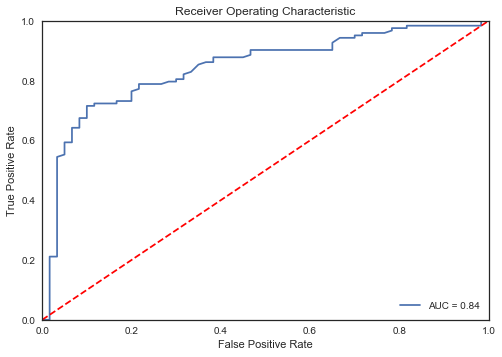

In [85]:
probs = model.predict_proba(titanic2[factors])
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(titanic2['Survived'], preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# What does your analysis show?

- What are your findings (in relation to your problem statement)?

> Being of younger age, female and in passenger class 1 has a positive impact on surviving the sinking of the Titanic. Poor male travellers had the lowest rate of survival. 

> Based on the models we have built, we can predict with approximately 80% accuracy whether a passenger will survive a disaster like the sinking of the Titanic given their sex, age, and class. This is on the previous assumption that all passengers had equal access to the disproportionate number of lifeboats available. 

# Bonus

## Impute missing values

- Which columns have missing values that you could impute rather than dropping the whole row?

In [87]:
null_data = titanic[titanic.isnull().any(axis=1)]
null_data

#The Age column could be imputed to replace the missing values. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [88]:
titanic_filled = titanic.fillna(titanic.mean())
titanic_filled

#Alternatively, we could use the Imputer function, but that some data wrangling would be required. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [91]:
model = LogisticRegression(C=1e9)
titanic_new2 = titanic2.fillna(titanic2.mean())
factors = ['Sex_male', 'Age', "Pclass_2","Pclass_3", "SibSp"]
model.fit(titanic_new2[factors], titanic_new2['Survived'])

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

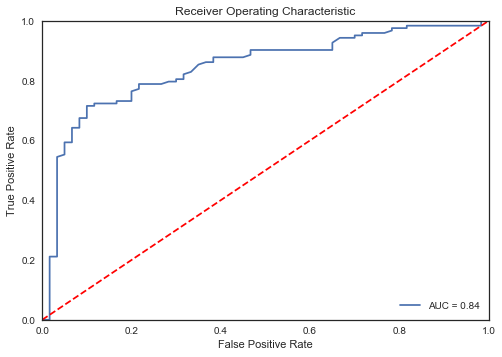

In [92]:
probs = model.predict_proba(titanic_new2[factors])
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(titanic_new2['Survived'], preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Visualize a decision tree classifier

[Example of a visualization](http://scikit-learn.org/stable/_images/iris.svg)  
[sklearn reference](http://scikit-learn.org/stable/modules/tree.html)

In [93]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

X = titanic_new2[['Sex_male', 'Age', 'Pclass_2', 'Pclass_3', 'SibSp','Survived']].dropna()
y = X['Survived']
X.drop('Survived', axis=1, inplace=True)
    
# Fits the model
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [102]:
 def build_tree_image(model):
    #dotfile = open("tree.dot", 'w')
    export_graphviz(model, out_file = "titanic_tree.dot", feature_names = X.columns)
    #dotfile.close()
    system("dot -Tpng titanic_tree.dot -o titanic_tree.png")
    
build_tree_image(model)
#from IPython.display import Image
#import pydotplus
#import pydot
#dotfile = StringIO()
#titanic_tree.export_graphviz(dtreg, out_file=dotfile)
#pydot.graph_from_dot_data(dotfile.getvalue()).write_png("titanic_tree.png")

In [103]:
model = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 5)
model.fit(X, y)
#build_tree_image(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [104]:
build_tree_image(model)

In [105]:
def fit_model(model, xtrain, ytrain):
    model.fit(xtrain,ytrain)
    return model

dt = fit_model(tree.DecisionTreeClassifier(max_depth=3), X, y)

Couldn't get the image to load, so i saved it separately in a png file. 